<a href="https://colab.research.google.com/github/rodrigofardin/Reconhecimento-de-Padroes/blob/main/RegressaoCaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

A base de dados escolhida foi o conjunto de dados de habitações da Califórnia (para regressão), disponível no Real world datasets do Scikit-learn.

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [ ]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Features names

In [ ]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Criando as matrizes de dados X e y

In [ ]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)

(20640, 8) (20640,)


Base de dados que será trabalhada

0


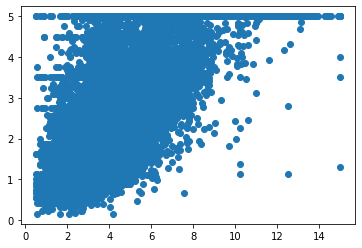

1


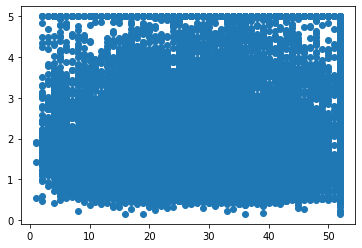

2


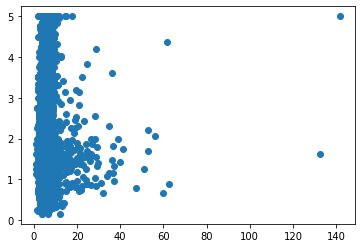

3


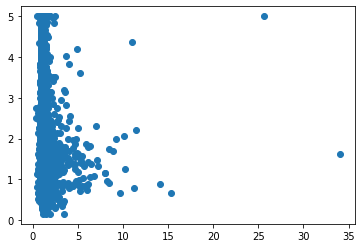

4


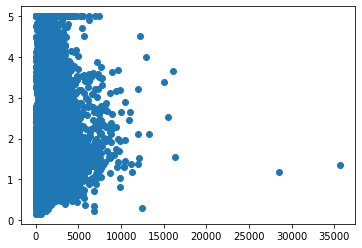

5


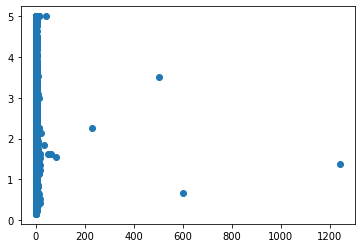

6


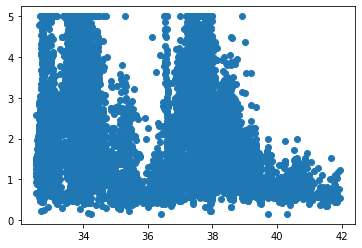

7


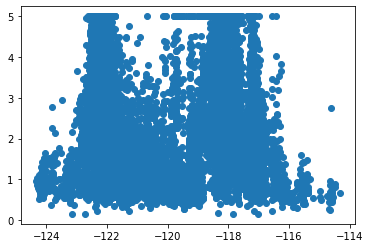

In [ ]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

**Modelo de Regressão Linear**

Definindo o modelo de regressão

In [ ]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()

In [ ]:
modelo.fit(X, y)
ypred = modelo.predict(X)
ypred.shape

(20640,)


Visualização da reta de regressão linear que o modelo gerou, com os mesmos dados que criaram o modelo.


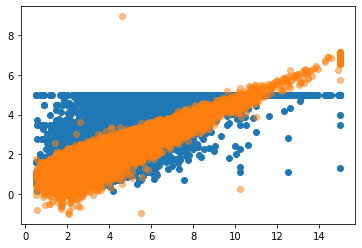

In [ ]:
X0 = X[:,0]
plt.scatter(X0, y)
plt.scatter(X0, ypred, alpha=0.5)

Calculando o MSE (erro quadrático médio)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, ypred)
print(mse)

0.5243209861846072


Calculando o MAE (Erro Absoluto Médio)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, ypred)
print(mae)

0.5311643817546476


Calculando o RMSE (Raiz Quadrada do Erro Médio)

In [ ]:
rmse = mean_squared_error(y, ypred, squared=False)
print(rmse)

0.7241001216576387


Utilizando os atributos coef_ e intercept_ do modelo, sendo eles respectivamente o coeficiente angular e linear de nossa reta

In [ ]:
print(modelo.intercept_,'\n', modelo.coef_)

-36.94192020718441 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


Plotando um gráfico (2D) do MSE em função do atributo intercept_ da classe LinearRegression. Mantendo os valores do atributo coef_ fixos e variando o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

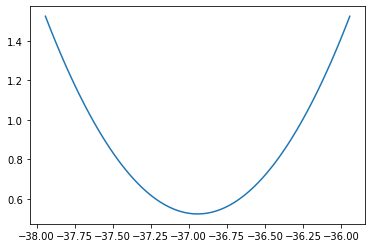

In [ ]:
import numpy as np

def plot(delta):
  erros = []
  intercept = modelo.intercept_
  ws = np.linspace(intercept-delta, intercept+delta, 100)
  for w in ws:
    modelo.intercept_= w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.intercept_ = intercept
  plt.plot(ws, erros)
  plt.show()

plot(1)